In [52]:
#Transformaciones 
import pandas as pd
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\dataset_16.09.csv"
trans = pd.read_csv(ruta)
trans[trans["age"]<18]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,1182,0,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,1411,0,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,4020,0,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,5681,0,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,6764,0,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,8420,0,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,9471,0,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,9553,0,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,9752,0,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,10679,0,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


In [2]:
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

trans['Clase de edad'] = trans['age'].apply(clase_edad)
trans # Para visualizar la tabla generada


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clase de edad
0,1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-64
1,2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-64
2,3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-44
3,4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,55-64
4,5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11158,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,25-34
11158,11159,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,35-44
11159,11160,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,25-34
11160,11161,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,35-44


In [54]:
trans.to_csv(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Perfil de cliente\transformada_perfil_cliente.csv", index=False)

In [ ]:
#py -3.13 -m pip install KModes
#py -3.13 -m pip install prince
#py -3.13 -m pip install adjustText

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\dataset_16.09.csv"
trans = pd.read_csv(ruta)
trans['Clase de edad'] = trans['age'].apply(clase_edad)
trans = trans[["Clase de edad","job","marital","education","housing","loan"]]
# Crear DataFrame para graficar
# Ajustar el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)

mca = mca.fit(trans)

# Coordenadas de las filas (observaciones en los ejes MCA)
row_coords = mca.row_coordinates(trans)

# Coordenadas de las columnas (categorías en el espacio MCA)
col_coords = mca.column_coordinates(trans)

print("Coordenadas de las filas:")
print(row_coords)

print("\nCoordenadas de las categorías (columnas):")
print(col_coords)

fig, ax = plt.subplots(figsize=(8, 6))

# Puntos de las observaciones
ax.scatter(row_coords[0], row_coords[1], alpha=0.6, label="Observaciones")

# Puntos de las categorías
for i, (x, y) in enumerate(zip(col_coords[0], col_coords[1])):
    ax.scatter(x, y, color="red")
    ax.text(x+0.02, y+0.02, col_coords.index[i], fontsize=10)

ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)
ax.set_title("MCA - Representación en 2D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
plt.legend()
plt.show()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32070.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30563.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29202.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 28352.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100,

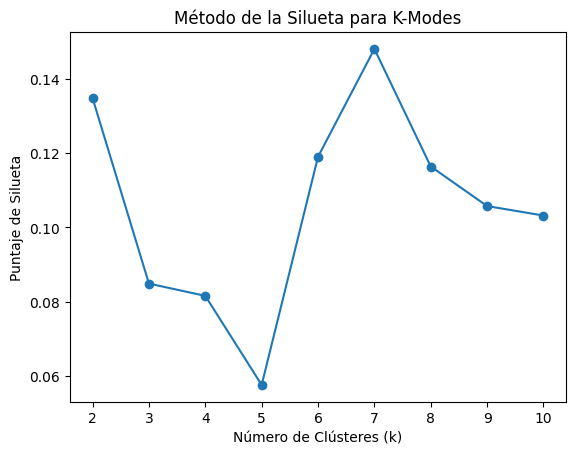

In [ ]:
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt

# Convertir las columnas categóricas a categorías numéricas usando pd.get_dummies
df_encoded = pd.get_dummies(trans)

# Probar diferentes valores de k (número de clusters)
silhouette_scores = []

for k in range(2, 11):  # Para que funcione, k debe ser al menos 2
    kmeans = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1, random_state=42)
    clusters = kmeans.fit_predict(trans)
    
    # Calcular el puntaje de la silueta con la métrica de Hamming
    score = silhouette_score(df_encoded, clusters, metric='hamming')
    silhouette_scores.append(score)

# Graficar la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta para K-Modes')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.show()

      age          job  marital  education housing loan  Cluster
0      59       admin.  married  secondary     yes   no        3
1      56       admin.  married  secondary      no   no        0
2      41   technician  married  secondary     yes   no        2
3      55     services  married  secondary     yes   no        4
4      54       admin.  married   tertiary      no   no        0
...    ..          ...      ...        ...     ...  ...      ...
11157  33  blue-collar   single    primary     yes   no        4
11158  39     services  married  secondary      no   no        0
11159  32   technician   single  secondary      no   no        6
11160  43   technician  married  secondary      no  yes        0
11161  34   technician  married  secondary      no   no        0

[11162 rows x 7 columns]
Centroides de los clusters: 
[['31' 'management' 'married' 'secondary' 'no' 'no' '0']
 ['32' 'management' 'single' 'tertiary' 'yes' 'no' '1']
 ['36' 'technician' 'married' 'primary' 'yes' 'no' '

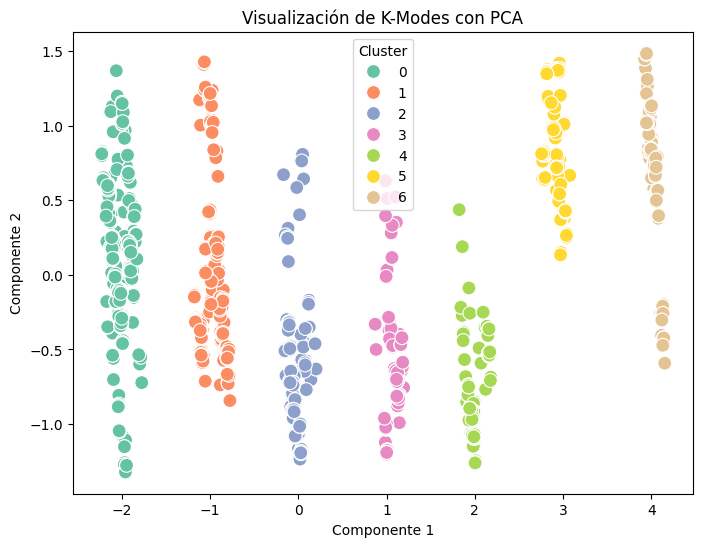

,age,job,marital,education,housing,loan,Cluster
0,59,admin.,married,secondary,yes,no,3
1,56,admin.,married,secondary,no,no,0
2,41,technician,married,secondary,yes,no,2
3,55,services,married,secondary,yes,no,4
4,54,admin.,married,tertiary,no,no,0
...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,yes,no,4
11158,39,services,married,secondary,no,no,0
11159,32,technician,single,secondary,no,no,6
11160,43,technician,married,secondary,no,yes,0


In [ ]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import prince

# Convertir las columnas a tipo categórico (si aún no lo son)
for col in trans.columns:
    trans[col] = trans[col].astype('category')

# Inicializar el modelo K-Modes
kmodes = KModes(n_clusters=7, init='Cao', n_init=10, verbose=0, random_state=42)

# Aplicar el K-Modes al dataframe
clusters = kmodes.fit_predict(trans)

# Mostrar el dataframe con los clusters asignados
trans['Cluster'] = clusters

# Ver los resultados
print(trans)

# Ver los centroides de los clusters
print("Centroides de los clusters: ")
print(kmodes.cluster_centroids_)

trans["Cluster"].value_counts() #Para ver el reparto de grupos por clústers




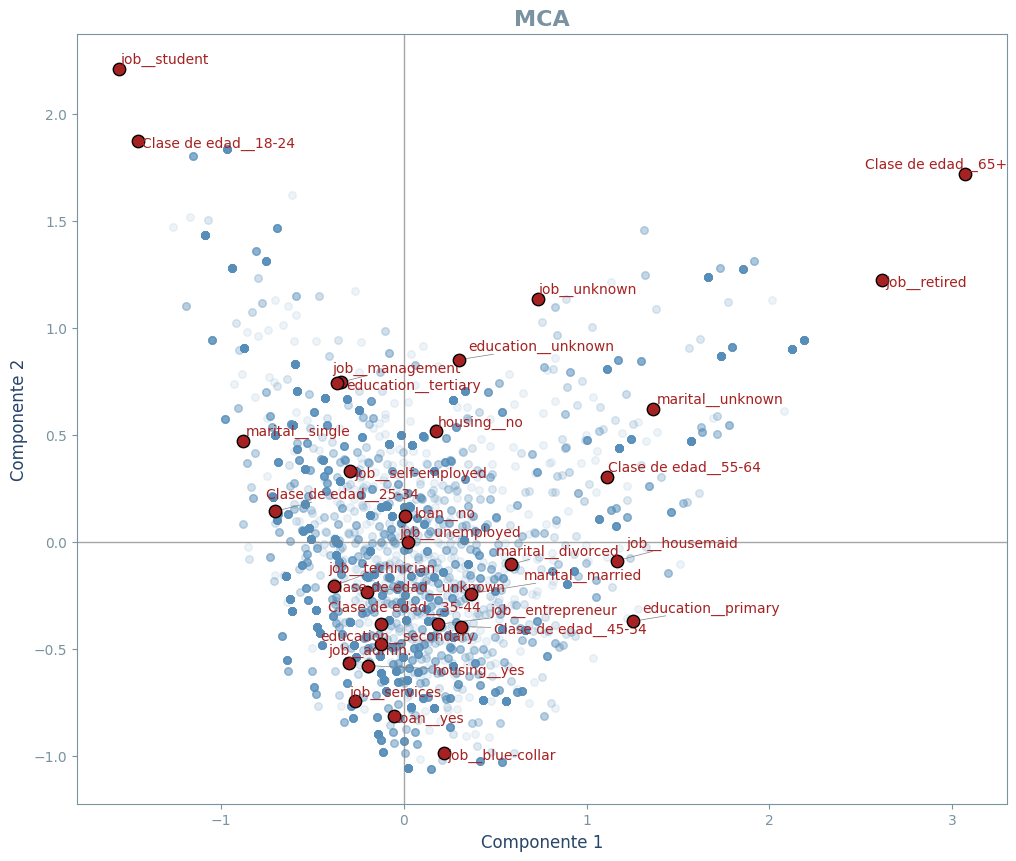

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.345         8.28%                      8.28%
1              0.301         7.23%                     15.52%

Contribución aproximada de cada variable por componente:


,0,1
Clase de edad__18-24,3%,5%
Clase de edad__25-34,8%,0%
Clase de edad__35-44,0%,2%
Clase de edad__45-54,1%,2%
Clase de edad__55-64,7%,1%
Clase de edad__65+,17%,6%
Clase de edad__unknown,0%,0%
job__admin.,1%,2%
job__blue-collar,0%,9%
job__entrepreneur,0%,0%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from adjustText import adjust_text  # 👈 para evitar solapamiento de etiquetas

ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\dataset_16.09.csv"
trans = pd.read_csv(ruta)
trans['Clase de edad'] = trans['age'].apply(clase_edad)
trans = trans[["Clase de edad","job","marital","education","housing","loan"]]

# Ajustar el MCA
mca = prince.MCA(
    n_components=2,
    random_state=42
)

mca = mca.fit(trans)

# Coordenadas de las filas (observaciones en los ejes MCA)
row_coords = mca.row_coordinates(trans)

# Coordenadas de las columnas (categorías en el espacio MCA)
col_coords = mca.column_coordinates(trans)

# === Gráfico ===
fig, ax = plt.subplots(figsize=(12, 10))

# Fondo transparente
fig.patch.set_alpha(0.0)   # fondo exterior transparente
ax.set_facecolor("none")   # fondo interior transparente

# Colores personalizados
color_obs = "#518AB7"   
color_cat = "#A62222"   
color_axis = "#7993A1"  # verde (texto y marco de los ejes)
color_text = "#284669"
# Puntos de las observaciones (sin leyenda)
ax.scatter(
    row_coords[0], row_coords[1],
    alpha=0.1, s=30,
    color=color_obs
)

# Puntos y etiquetas de las categorías
texts = []
for i, (x, y) in enumerate(zip(col_coords[0], col_coords[1])):
    ax.scatter(x, y, color=color_cat, s=80, edgecolor="black", zorder=3)
    texts.append(ax.text(x, y, col_coords.index[i], fontsize=10, color=color_cat))

# Ajustar etiquetas para que no se solapen
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="grey", lw=0.5))

# Ejes y detalles
ax.axhline(0, color="grey", lw=1, alpha=0.7)
ax.axvline(0, color="grey", lw=1, alpha=0.7)

# Títulos y etiquetas de ejes con color personalizado
ax.set_title("MCA", fontsize=16, fontweight="bold", color=color_axis)
ax.set_xlabel("Componente 1", color=color_text, fontsize=12)
ax.set_ylabel("Componente 2", color=color_text, fontsize=12)

# Cambiar color de los ticks de los ejes
ax.tick_params(axis="x", colors=color_axis)
ax.tick_params(axis="y", colors=color_axis)

# Cambiar color del marco (spines)
for spine in ax.spines.values():
    spine.set_color(color_axis)

# 👇 Eliminamos la leyenda
# plt.legend()  # eliminado

plt.show()

# Varianza explicada por componente
explained =mca.eigenvalues_summary
print(explained)
# Agrupar por nombre de variable (antes del "=" en el índice)

# contrib_by_var = col_coords.groupby(lambda x: x.split("=")[0]).apply(lambda g: (g**2).sum())

print("\nContribución aproximada de cada variable por componente:")
mca.column_contributions_.style.format('{:.0%}') # 0 es PC1 y 1 es PC2



In [25]:
trans["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [24]:
trans["education"].value_counts()

education
secondary    5474
tertiary     3685
primary      1500
unknown       503
Name: count, dtype: int64

In [26]:
trans["marital"].value_counts()

marital
married     6349
single      3517
divorced    1291
unknown        5
Name: count, dtype: int64

In [32]:
pd.options.display.max_rows = None
trans["age"].value_counts()


age
31    496
32    476
34    466
33    463
35    461
30    456
36    432
37    370
38    353
39    343
29    327
40    325
41    299
42    295
28    292
46    258
47    255
45    253
43    248
27    246
49    241
44    237
26    234
48    214
53    204
52    204
55    197
51    194
50    193
54    187
57    184
59    184
56    177
60    169
25    167
58    159
24     95
23     68
61     66
22     48
62     45
63     38
64     37
77     31
21     30
67     29
66     29
73     29
72     28
65     27
71     27
68     24
70     23
76     21
69     20
20     20
78     19
74     18
75     18
80     17
19     13
79     10
0      10
82     10
81      9
18      8
83      7
84      5
85      5
86      5
87      4
88      2
90      2
93      2
92      2
89      1
95      1
Name: count, dtype: int64